In [1]:
import pandas as pd
df_review = pd.read_csv("reviews.csv")
df_metadata = pd.read_csv("metadata.csv")


C:\Users\pc\AppData\Local\Temp\ipykernel_6352\1549693439.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review = pd.read_csv("reviews.csv")
C:\Users\pc\AppData\Local\Temp\ipykernel_6352\1549693439.py:3: DtypeWarning: Columns (4,7,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_metadata = pd.read_csv("metadata.csv")


In [2]:
import time
import ast

In [4]:
df_review.shape

(6739590, 13)

In [5]:
df_review.dropna(subset=['reviewText','asin','summary','reviewTime','reviewerID'], inplace=True)  # Dropping rows with missing title in reviews
df_metadata.dropna(subset=['title','description','brand'], inplace=True)  # Dropping rows with missing title in metadata

# Removing duplicates
df_review.drop_duplicates(subset=['reviewText','summary'], inplace=True)
df_metadata.drop_duplicates(subset=['title','description'], inplace=True)

In [7]:
number_of_product = 0
list_of_product = []
number_of_review = 0
for i in range(len(df_metadata["category"])):
    try:
        if ("Headphones" in df_metadata["title"][i]) or ("headphones" in df_metadata["title"][i]) or ("Headphone" in df_metadata["title"][i]) or ("headphone" in df_metadata["title"][i]):
            number_of_product+=1
            asin = df_metadata["asin"][i]
            list_of_product.append(asin)
            number_of_product+=1
    except:
        print()              
print(number_of_product)           
    

In [7]:
number_of_product

28150

In [8]:
matches = df_review[df_review['asin'].isin(list_of_product)]
matches.to_csv('headphone_reviews.csv', index=False)

In [10]:

avg_rating = 0 
no_good_rating = 0
no_bad_rating = 0
corresponding_no_review = {}
total_rows =0 
for rating in matches["overall"]:
    if(float(rating)>3.0):
        no_good_rating +=1
    else:
        no_bad_rating+=1
    if int(rating) not in corresponding_no_review:
        corresponding_no_review[rating] = 1
    else:
        corresponding_no_review[rating]+=1
    avg_rating+=float(rating)
    total_rows+=1
avg_rating = avg_rating/total_rows


In [12]:
print(f"average rating for Electronics {avg_rating}")
print(f"Number of good rating {no_good_rating}" )
print(f"Number of bad rating {no_bad_rating}")
print(f"Number of reviews per rating {corresponding_no_review}")
print(f"Number of reviews for Headphones {total_rows}")
print(f"Number of unique product with electronic catogary {number_of_product}")

average rating for Electronics 4.064999879523878
Number of good rating 247670
Number of bad rating 84346
Number of reviews per rating {5.0: 181960, 1.0: 26410, 3.0: 34723, 4.0: 65710, 2.0: 23213}
Number of reviews for Headphones 332016
Number of unique product with electronic catogary 44468


In [15]:
import re
import unicodedata
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
nltk.download('wordnet')

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

acronym_dict = {
    "afaik": "as far as I know",
    "afk": "away from keyboard",
    "ama": "ask me anything",
    "asap": "as soon as possible",
    "b2b": "business to business",
    "bbl": "be back later",
    "bbs": "be back soon",
    "bday": "birthday",
    "brb": "be right back",
    "btw": "by the way",
    "cc": "carbon copy",
    "cmon": "come on",
    "cu": "see you",
    "cya": "see you",
    "cys": "check your settings",
    "d2d": "direct to direct",
    "dr": "doctor",
    "e2e": "end to end",
    "faq": "frequently asked question",
    "fav": "favorite",
    "favs": "favorites",
    "ffs": "for f*ck's sake",
    "foaf": "friend of a friend",
    "ftw": "for the win",
    "fyi": "for your information",
    "g2g": "got to go",
    "g2m": "got to meet you",
    "gj": "good job",
    "gm": "good morning",
    "gmta": "great minds think alike",
    "hth": "hope this helps",
    "ianal": "I am not a lawyer",
    "ianars": "I am not a rocket scientist",
    "ic": "I see",
    "icymi": "in case you missed it",
    "idk": "i do not know",
    "iirc": "if I recall correctly",
    "ikr": "i know right",
    "imho": "in my humble opinion",
    "imnsho": "in my not so humble opinion",
    "imo": "in my opinion",
    "iow": "in other words",
    "irl": "in real life",
    "jj": "just joking",
    "jk": "just kidding",
    "jooc": "just out of curiosity",
    "kk": "okay",
    "l8": "late",
    "l8r": "later",
    "lmao": "laugh my a** off",
    "lol": "laughing out loud",
    "mfw": "my face when",
    "myob": "mind your own business",
    "nm": "never mind",
    "noyb": "none of your business",
    "np": "no problem",
    "nvm": "never mind",
    "oic": "oh, i see",
    "omfg": "oh my f*cking god",
    "omg": "oh my god",
    "omw": "on my way",
    "ooc": "out of character",
    "oof": "out of focus",
    "ot": "off topic",
    "otoh": "on the other hand",
    "p2p": "peer to peer",
    "pfo": "please f*ck off",
    "pita": "pain in the a**",
    "plz": "please",
    "pms": "personal messages",
    "r8": "right",
    "rofl": "rolling on the floor laughing",
    "roflmao": "rolling on the floor laughing my a** off",
    "rp": "reply",
    "rps": "rock paper scissors",
    "rpsls": "rock paper scissors lizard spock",
    "rtfa": "read the f*cking article",
    "rtfm": "read the f*cking manual",
    "ru": "are you",
    "s2s": "same to same",
    "smh": "shake my head",
    "tbh": "to be honest",
    "thx": "thanks",
    "tia": "thanks in advance",
    "tldr": "too long did not read",
    "ttyl": "talk to you later",
    "wtf": "what the f*ck",
    "wtg": "way to go",
    "wtgp": "way to go pal",
    "ymmv": "your mileage may vary"
}
def expand_acronyms(text, acronym_dict):
    words = text.split()
    expanded_text = [acronym_dict[word.lower()] if word.lower() in acronym_dict else word for word in words]
    return ' '.join(expanded_text)


def remove_special_characters(text):
    pattern = r'[^a-zA-z0-9\s]' 
    return re.sub(pattern, '', text)

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word, wordnet.VERB) for word in text.split()])
    return lemmatized_text

def text_normalizer(text):
    text = text.lower()
    text = remove_html_tags(text)
    text = remove_accented_chars(text)
    text = expand_acronyms(text, acronym_dict)
    text = remove_special_characters(text)
    text = lemmatize_text(text)
    text = ' '.join(word_tokenize(text))
    return text



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
matches['reviewText'] = matches['reviewText'].apply(text_normalizer)
matches['reviewText'] 

C:\Users\pc\AppData\Local\Temp\ipykernel_16824\3989043937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['reviewText'] = matches['reviewText'].apply(text_normalizer)


4824       im get listen station go in several elementary...
4825       need headset for watch and edit videos late at...
4826       i be out of town for a month and need a pair o...
4827       obviously these headphones be not for the audi...
4828       i buy these headphones at a tower record about...
                                 ...                        
6709533    very nice headphone at a price you can afford ...
6709534         these be really good the sound be incredible
6709591    these be good not great or amaze they be about...
6709641    when connect it work well lose connection some...
6709642    when it work the sound be good however its ver...
Name: reviewText, Length: 212923, dtype: object

In [20]:
merged_df = pd.merge(matches, df_metadata, on='asin', how='inner') 
merged_df
columns_to_drop = ['vote', 'verified',  'style','feature','main_cat','also_view','rank','date','similar_item','price','imageURL','imageURLHighRes','details','tech1','fit','also_buy','tech2','reviewerName','image']  # Specify the columns you want to drop
merged_df.drop(columns=columns_to_drop, inplace=True)
merged_df.to_csv('final_csv.csv', index=False)

In [1]:
import pandas as pd
merged_df = pd.read_csv("final_csv.csv")

In [22]:
brands_reviews = {}
indiudual_review_rating = {}
indiudual_review_count ={}
year_wise_count_reviews = {}
highest_rating = 0
corresponding_no_review_2018 = {}
for brand, rating , asin ,date in zip(merged_df["brand"], merged_df["overall"],merged_df["asin"],merged_df["reviewTime"]):
    if brand not in brands_reviews:
        brands_reviews[brand] = 1
    else:
        brands_reviews[brand] += 1
    if asin not in indiudual_review_rating:
        indiudual_review_rating[asin]=float(rating)
    else:
        indiudual_review_rating[asin]+=float(rating)
    if asin not in indiudual_review_count:
        indiudual_review_count[asin]=1
    else:
        indiudual_review_count[asin]+=1
    
    year = date.split(", ")[1]
    
    if int(year) > 2013:
        if rating not in corresponding_no_review_2018:
            corresponding_no_review_2018[rating] = 1
        else:
            corresponding_no_review_2018[rating]+=1
        if year not in year_wise_count_reviews:
            year_wise_count_reviews[year]=1
        else:
            year_wise_count_reviews[year]+=1
    else:
        if year not in year_wise_count_reviews:
            year_wise_count_reviews[year]=1
        else:
            year_wise_count_reviews[year]+=1
            
highest_key = ""
for keys in indiudual_review_count:
    temp = indiudual_review_rating[keys]/indiudual_review_count[keys]
    if temp>highest_rating:
        highest_rating = temp
        highest_key = keys
        
lowest_20 = sorted(brands_reviews.items(), key=lambda x: x[1])[:20]
top_20 = sorted(brands_reviews.items(), key=lambda x: x[1], reverse=True)[:20]
        

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [24]:
# word cloud
positive_reviews = ' '.join(merged_df[merged_df['overall'] >= 3]['reviewText'])
negative_reviews = ' '.join(merged_df[merged_df['overall'] <= 3]['reviewText'])  
positive_wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(negative_reviews)

In [25]:
ratings = list(corresponding_no_review.keys())
num_reviews = list(corresponding_no_review.values())

top 20 brands: [('Sony', 16986), ('Sennheiser', 13167), ('Bose', 6804), ('Audio-Technica', 6165), ('Panasonic', 4672), ('Philips', 4449), ('Etre Jeune', 4159), ('Bluedio', 4049), ('Mpow', 3760), ('Koss', 3715), ('Plantronics', 3390), ('JVC', 3363), ('Toysdone', 3286), ('MEE audio', 3261), ('JLAB', 3022), ('Symphonized', 3010), ('TaoTronics', 2494), ('EldHus', 2273), ('Photive', 2273), ('Jaybird', 2064)]
lowest 20 brands: [('Honda', 1), ('AIRDRIVES', 2), ('California Cable Market', 2), ('DetectorPro', 3), ('NOIZY Brands', 3), ('Best Compu', 3), ('accessgood', 3), ('KinGHonor', 3), ('APG', 3), ('TOOPOOT', 3), ('SmithOutlet', 3), ('SmartEra', 3), ('Keeda', 3), ('TVTimedirect', 4), ('Gear4', 4), ('eBigValue', 4), ('iCable', 4), ('Nickelodeon', 4), ('Sunyee', 4), ('Crosley', 4)]
Most positively reviewed product: B00022OAH0
count of ratings for the product over 5 consecutive years {3.0: 18052, 2.0: 12418, 5.0: 90433, 4.0: 32631, 1.0: 13760}


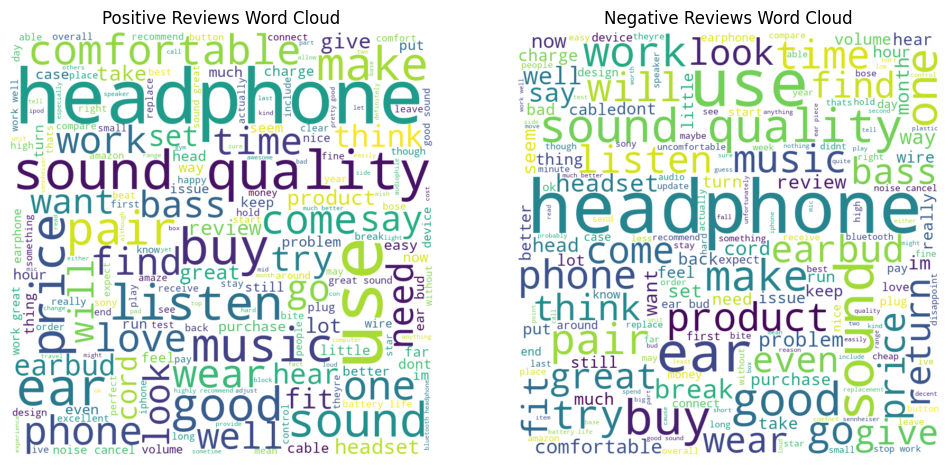

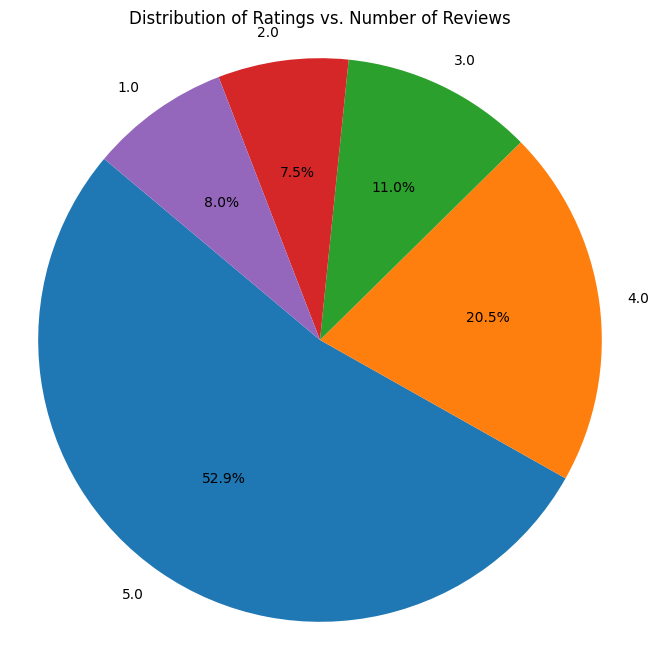

In [26]:
print(f"top 20 brands: {top_20}")
print(f"lowest 20 brands: {lowest_20}")
print(f"Most positively reviewed product: {highest_key}")
print(f"count of ratings for the product over 5 consecutive years {corresponding_no_review_2018}")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()

plt.figure(figsize=(8, 8))
plt.pie(num_reviews, labels=ratings, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings vs. Number of Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [3]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [5]:
merged_df

,Unnamed: 0_x,overall,reviewTime,reviewerID,asin,reviewText,summary,unixReviewTime,Unnamed: 0_y,category,description,title,brand
0,4824,5.0,"02 28, 2013",A15U5NUS1EY7IQ,B000001OMI,im get listen station go in several elementary...,Works well,1362009600,2320,"['Electronics', 'Headphones', 'On-Ear Headphon...","[""The stylish HP200S Stereo Line silver headph...",Maxell 190318 Lightweight Adjustable Open Air ...,Maxell
1,4825,5.0,"10 17, 2012",AHGGNAIT6BH5X,B000001OMI,need headset for watch and edit videos late at...,HP 200 Stereo Headset,1350432000,2320,"['Electronics', 'Headphones', 'On-Ear Headphon...","[""The stylish HP200S Stereo Line silver headph...",Maxell 190318 Lightweight Adjustable Open Air ...,Maxell
2,4826,4.0,"09 27, 2012",A33HUURDJ4DVG3,B000001OMI,i be out of town for a month and need a pair o...,"For the price, you cannot beat them",1348704000,2320,"['Electronics', 'Headphones', 'On-Ear Headphon...","[""The stylish HP200S Stereo Line silver headph...",Maxell 190318 Lightweight Adjustable Open Air ...,Maxell
3,4827,5.0,"11 27, 2008",A680RUE1FDO8B,B000001OMI,obviously these headphones be not for the audi...,Excellent day-to-day headphones,1227744000,2320,"['Electronics', 'Headphones', 'On-Ear Headphon...","[""The stylish HP200S Stereo Line silver headph...",Maxell 190318 Lightweight Adjustable Open Air ...,Maxell
4,4828,3.0,"12 24, 2007",A3OLAZKM77XR6P,B000001OMI,i buy these headphones at a tower record about...,Foldable but didn't last long,1198454400,2320,"['Electronics', 'Headphones', 'On-Ear Headphon...","[""The stylish HP200S Stereo Line silver headph...",Maxell 190318 Lightweight Adjustable Open Air ...,Maxell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212918,6709533,5.0,"05 17, 2018",A3BYIQVL5YI2RB,B01CI2RK2S,very nice headphone at a price you can afford ...,"Great headphones, good price",1526515200,739400,"['Electronics', 'Headphones', 'Earbud Headphon...","['', '<b>Pure Sound Quality</b><br /> AUKEY In...","AUKEY Headphones, In-Ear Earbuds with Metal Ho...",AUKEY
212919,6709534,5.0,"03 30, 2018",A9WPTYOBUTMBX,B01CI2RK2S,these be really good the sound be incredible,Incredible,1522368000,739400,"['Electronics', 'Headphones', 'Earbud Headphon...","['', '<b>Pure Sound Quality</b><br /> AUKEY In...","AUKEY Headphones, In-Ear Earbuds with Metal Ho...",AUKEY
212920,6709591,3.0,"07 23, 2018",A1JX01HLD4Z3RY,B01CIMC30W,these be good not great or amaze they be about...,Not bad,1532304000,739507,"['Electronics', 'Headphones', 'On-Ear Headphon...","['', 'The new Trolls Poppy kid friendly headph...",Trolls Poppy Kid Friendly Headphones with Buil...,Trolls
212921,6709641,3.0,"12 5, 2017",AXHIBSHUM8HJ8,B01CIZC6SS,when connect it work well lose connection some...,Its ok and serves it's purpose.,1512432000,739599,"['Electronics', 'Car & Vehicle Electronics', '...",[],SoundBot SB335 Universal Wireless Bluetooth Re...,SoundBot


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'reviewText' is the column containing text data
# Drop rows with NaN values in the 'reviewText' column
merged_df.dropna(subset=['reviewText'], inplace=True)

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the data
bow_matrix = count_vectorizer.fit_transform(merged_df['reviewText'])

# Convert sparse matrix to DataFrame
bow_df = pd.DataFrame.sparse.from_spmatrix(bow_matrix, columns=count_vectorizer.get_feature_names_out())

print("Bag of Words (BoW) Model:")
print(bow_df)


Bag of Words (BoW) Model:
        00  000  0000  0000000  0000000000  00000001  0000i  0001  0009  001  \
0        0    0     0        0           0         0      0     0     0    0   
1        0    0     0        0           0         0      0     0     0    0   
2        0    0     0        0           0         0      0     0     0    0   
3        0    0     0        0           0         0      0     0     0    0   
4        0    0     0        0           0         0      0     0     0    0   
...     ..  ...   ...      ...         ...       ...    ...   ...   ...  ...   
212912   0    0     0        0           0         0      0     0     0    0   
212913   0    0     0        0           0         0      0     0     0    0   
212914   0    0     0        0           0         0      0     0     0    0   
212915   0    0     0        0           0         0      0     0     0    0   
212916   0    0     0        0           0         0      0     0     0    0   

        ...  

In [7]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(str(merged_df['reviewText']))
tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())

print("TF-IDF Model (Sparse Matrix):")
print(tfidf_df)


ValueError: np.nan is an invalid document, expected byte or unicode string.

In [43]:
hashing_vectorizer = HashingVectorizer(n_features=1000)
hashing_matrix = hashing_vectorizer.fit_transform(merged_df['reviewText'])
hashing_df = pd.DataFrame(hashing_matrix.toarray())

print("Hashing Vectorizer:")
print(hashing_df)
print()

Hashing Vectorizer:
        0    1         2    3         4         5    6    7    8    9    ...  \
0       0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  ...   
1       0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  ...   
2       0.0  0.0  0.000000  0.0  0.082479  0.000000  0.0  0.0  0.0  0.0  ...   
3       0.0  0.0 -0.033296  0.0  0.000000 -0.099889  0.0  0.0  0.0  0.0  ...   
4       0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  ...   
...     ...  ...       ...  ...       ...       ...  ...  ...  ...  ...  ...   
212918  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  ...   
212919  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  ...   
212920  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  ...   
212921  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  ...   
212922  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  ...   

        990  991  9

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
def map_rating_class(rating):
    if rating > 3:
        return 'Good'
    elif rating == 3:
        return 'Average'
    else:
        return 'Bad'

# Map ratings to classes
merged_df['Rating_Class'] = merged_df['overall'].apply(map_rating_class)


# Set 'Rating_Class' as target variable
y = merged_df['Rating_Class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(bow_df, y, test_size=0.25, random_state=42)


In [87]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
157777,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
94216,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
61484,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
16430,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.196116,0.0,0.0,0.0
105927,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86165,0.0,0.0,0.0,0.043685,0.0,-0.174741,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.043685,0.000000,0.0,0.0,0.0
146338,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
81971,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
74885,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [26]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNN": KNeighborsClassifier()
}

# Train each model and evaluate performance
for name, model in models.items():
    print("Model:", name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=['Bad', 'Average', 'Good'])
    print(report)
    print("="*70)


Model: Logistic Regression


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         Bad       0.44      0.15      0.22      5896
     Average       0.71      0.61      0.65      8355
        Good       0.85      0.96      0.90     38980

    accuracy                           0.82     53231
   macro avg       0.67      0.57      0.59     53231
weighted avg       0.78      0.82      0.79     53231

Model: Decision Tree


In [28]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Initialize models
models = {
    "AdaBoost": AdaBoostClassifier()
}

# Train each model and evaluate performance
for name, model in models.items():
    print("Model:", name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=['Bad', 'Average', 'Good'])
    print(report)
    print("="*70)

Model: AdaBoost


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

         Bad       0.39      0.06      0.11      5896
     Average       0.61      0.40      0.48      8355
        Good       0.80      0.96      0.87     38980

    accuracy                           0.77     53231
   macro avg       0.60      0.48      0.49     53231
weighted avg       0.72      0.77      0.73     53231



In [2]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# Chunk size for reading data
chunk_size = 10000

# Create an iterator to read the CSV file in chunks
chunks = pd.read_csv("final_csv.csv", chunksize=chunk_size)

# Initialize user and item mappers
user_mapper = {}
item_mapper = {}
user_index = 0
item_index = 0

# Initialize lists to hold data for sparse matrix construction
user_indices = []
item_indices = []
ratings = []

# Iterate over chunks to build mappers and sparse matrix
for chunk in chunks:
    # Create a mapping for users
    for user_id in chunk['reviewerID'].unique():
        if user_id not in user_mapper:
            user_mapper[user_id] = user_index
            user_index += 1
    
    # Create a mapping for items
    for item_id in chunk['asin'].unique():
        if item_id not in item_mapper:
            item_mapper[item_id] = item_index
            item_index += 1
    
    # Map user and item IDs to integer indices
    chunk['user_index'] = chunk['reviewerID'].map(user_mapper)
    chunk['item_index'] = chunk['asin'].map(item_mapper)
    
    # Append data to lists for sparse matrix construction
    user_indices.extend(chunk['user_index'])
    item_indices.extend(chunk['item_index'])
    ratings.extend(chunk['overall'])

# Create the sparse user-item rating matrix
sparse_rating_matrix = csr_matrix((ratings, (user_indices, item_indices)),
                                  shape=(len(user_mapper), len(item_mapper)))

# Compute cosine similarity between users
user_similarity_matrix = cosine_similarity(sparse_rating_matrix, dense_output=False)

def top_n_similar_users_for_user(user_similarity_matrix,user_index, N):
    # Get similarity scores for the given user
    similarity_scores = user_similarity_matrix[user_index, :].toarray().ravel()
    # Exclude the user's own similarity score
    similarity_scores[user_index] = -1
    # Find indices of top N similar users
    top_n_indices = similarity_scores.argsort()[-N:][::-1]
    # Calculate the average similarity of top N users
    average_similarity = np.mean(similarity_scores[top_n_indices])
    return top_n_indices, average_similarity

def top_n_similar_users(user_similarity_matrix,  N):
    num_users = user_similarity_matrix.shape[0]
    top_n_indices_max = []
    avg_similarities_max = 0
    for user_index in range(num_users):
        top_n_indices, avg_similarity = top_n_similar_users_for_user(user_similarity_matrix, user_index, N)
        if(avg_similarities_max<avg_similarity):
            avg_similarities_max=avg_similarity
            top_n_indices_max=top_n_indices
    return top_n_indices_max
    

# Example: Find top 10 similar users for a specific user (user index = 0)
user_index = 0
N_values = [10, 20, 30, 40, 50]

for N in N_values:
    top_similar_users_for_user = top_n_similar_users(user_similarity_matrix,  N)
    print(f"Top {N} similar users  {top_similar_users_for_user}")


Top 10 similar users for user index 0: [    27     12     33     29     28     34     26 150665     20     18]
Top 20 similar users for user index 0: [    27     12     33     29     28     34     26 150665     20     18
     14     13     16     11      7      2 150666      4      5      6]
Top 30 similar users for user index 0: [    70     81     60     62     85     86     63     88     89     90
     69     92     93     64     95     96     97     98     99     77
     76     55    103    104     74 150677    108    109     67    111]
Top 40 similar users for user index 0: [248 181 164 166 167 168 175 177 179 183 156 186 187 190 191 195 197 199
 159 155 120 132 123 125 126 128 129 130 131 133 154 136 140 145 148 149
 152 153 200 204]
Top 50 similar users for user index 0: [248 181 164 166 167 168 175 177 179 183 156 186 187 190 191 195 197 199
 159 155 120 132 123 125 126 128 129 130 131 133 154 136 140 145 148 149
 152 153 200 204 205 283 261 269 270 275 276 279 280 285]


In [2]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# Define the number of folds (K)
K = 5

# Define the values of N (number of similar users)
N_values = [10, 20, 30, 40, 50]

# Initialize list to store MAE for each value of N
mae_values = {N: [] for N in N_values}

# Perform K-fold cross-validation
kf = KFold(n_splits=K, shuffle=True, random_state=42)

for train_index, val_index in kf.split(sparse_rating_matrix):
    # Split data into training and validation sets
    X_train, X_val = sparse_rating_matrix[train_index], sparse_rating_matrix[val_index]
    
    # Compute user similarity matrix using training data
    user_similarity_matrix_train = cosine_similarity(X_train, dense_output=False)
    
    # Iterate over different values of N
    for N in N_values:
        # Initialize list to store predicted ratings
        predicted_ratings = []
        
        # Iterate over users in the validation set
        for user_index in range(X_val.shape[0]):
            # Get top N similar users for each user in the validation set
            top_similar_users = top_n_similar_users_for_user(user_similarity_matrix_train, user_index, N)
            
            # Calculate predicted rating based on average of similar users' ratings
            similar_ratings = sparse_rating_matrix[top_similar_users, :].toarray()
            predicted_rating = np.mean(similar_ratings, axis=0)
            predicted_ratings.append(predicted_rating)
        
        # Calculate MAE for the current fold and value of N
        actual_ratings = X_val.toarray()
        mae = mean_absolute_error(actual_ratings, predicted_ratings)
        mae_values[N].append(mae)

# Calculate average MAE across all folds for each value of N
avg_mae_values = {N: np.mean(mae_values_list) for N, mae_values_list in mae_values.items()}

# Print the average MAE for each value of N
for N, avg_mae in avg_mae_values.items():
    print(f"MAE for N={N}: {avg_mae}")



MAE for N=10: 0.002611208233487918
MAE for N=20: 0.002609048595536586
MAE for N=30: 0.0026080382724834907
MAE for N=40: 0.0026060242569436293
MAE for N=50: 0.002606042978435727


In [4]:
# Compute cosine similarity between items
item_similarity_matrix = cosine_similarity(sparse_rating_matrix.T, dense_output=False)

def top_n_similar_items_for_item(item_similarity_matrix, item_index, N):
    # Get similarity scores for the given item
    similarity_scores = item_similarity_matrix[item_index, :].toarray().ravel()
    # Exclude the item's own similarity score
    similarity_scores[item_index] = -1
    # Find indices of top N similar items
    top_n_indices = similarity_scores.argsort()[-N:][::-1]
    return top_n_indices

# Example: Find top 10 similar items for a specific item (item index = 0)
item_index = 0
N_values = [10, 20, 30, 40, 50]

for N in N_values:
    top_similar_items_for_item = top_n_similar_items_for_item(item_similarity_matrix, item_index, N)
    print(f"Top {N} similar items for item index {item_index}: {top_similar_items_for_item}")
    
# Initialize list to store MAE for each value of N
mae_values_item = {N: [] for N in N_values}

# Perform K-fold cross-validation for item-item collaborative filtering
for train_index, val_index in kf.split(sparse_rating_matrix.T):  # Transpose for item-item
    # Split data into training and validation sets
    X_train, X_val = sparse_rating_matrix.T[train_index], sparse_rating_matrix.T[val_index]
    
    # Compute item similarity matrix using training data
    item_similarity_matrix_train = cosine_similarity(X_train, dense_output=False)
    
    # Iterate over different values of N
    for N in N_values:
        # Initialize list to store predicted ratings
        predicted_ratings_item = []
        
        # Iterate over items in the validation set
        for item_index in range(X_val.shape[0]):
            # Get top N similar items for each item in the validation set
            top_similar_items = top_n_similar_items_for_item(item_similarity_matrix_train, item_index, N)
            
            # Calculate predicted rating based on average of similar items' ratings
            similar_ratings_item = sparse_rating_matrix.T[top_similar_items, :].toarray()
            predicted_rating_item = np.mean(similar_ratings_item, axis=0)
            predicted_ratings_item.append(predicted_rating_item)
        
        # Calculate MAE for the current fold and value of N
        actual_ratings_item = X_val.toarray()
        mae_item = mean_absolute_error(actual_ratings_item, predicted_ratings_item)
        mae_values_item[N].append(mae_item)

# Calculate average MAE across all folds for each value of N for item-item collaborative filtering
avg_mae_values_item = {N: np.mean(mae_values_list) for N, mae_values_list in mae_values_item.items()}

# Print the average MAE for each value of N for item-item collaborative filtering
for N, avg_mae_item in avg_mae_values_item.items():
    print(f"MAE for N={N} (item-item collaborative filtering): {avg_mae_item}")


Top 10 similar items for item index 0: [1261  322 2682  242   83   27 4003  204 4342  838]
Top 20 similar items for item index 0: [1261  322 2682  242   83   27 4003  204 4342  838 1090  405   84 4053
 1837   19 1308  775 4156 1110]
Top 30 similar items for item index 0: [1261  322 2682  242   83   27 4003  204 4342  838 1090  405   84 4053
 1837   19 1308  775 4156 1110 1716   95  627   33 1286   64  231 1444
 2264  884]
Top 40 similar items for item index 0: [1261  322 2682  242   83   27 4003  204 4342  838 1090  405   84 4053
 1837   19 1308  775 4156 1110 1716   95  627   33 1286   64  231 1444
 2264  884   13 1236  862  668  188 2296  342  107  129 2033]
Top 50 similar items for item index 0: [1261  322 2682  242   83   27 4003  204 4342  838 1090  405   84 4053
 1837   19 1308  775 4156 1110 1716   95  627   33 1286   64  231 1444
 2264  884   13 1236  862  668  188 2296  342  107  129 2033  296 1810
 1546 1498 1513 1512 1511 1510 1509 1508]
MAE for N=10 (item-item collaborative

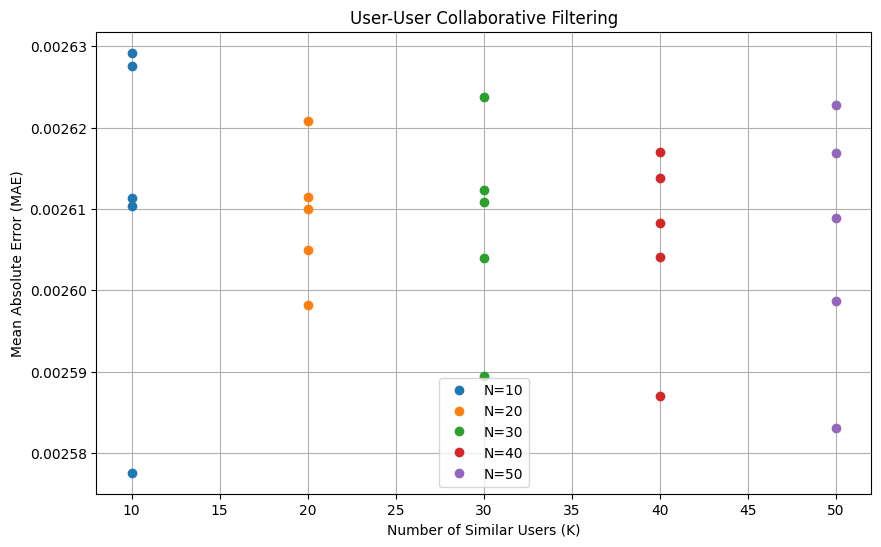

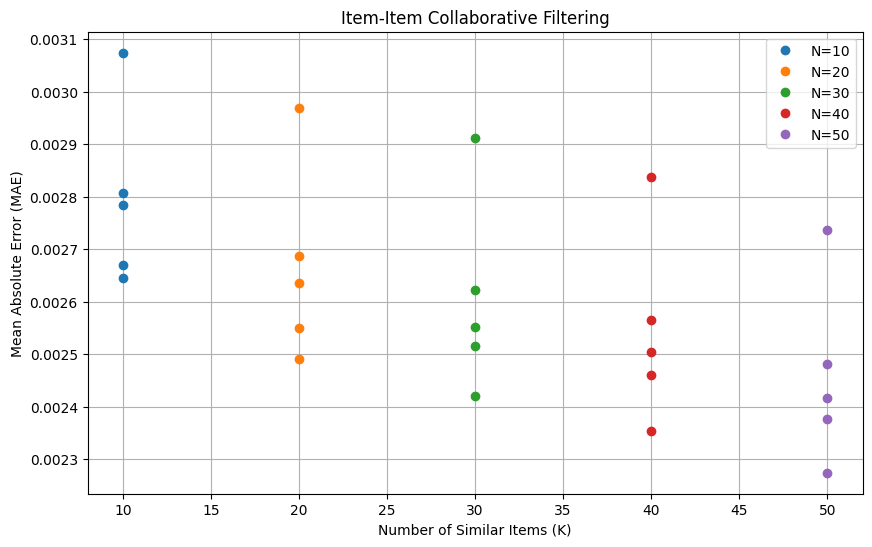

In [5]:
import matplotlib.pyplot as plt

# Plot for user-user collaborative filtering
plt.figure(figsize=(10, 6))
for N, avg_mae in avg_mae_values.items():
    plt.plot([N]*K, mae_values[N], 'o', label=f"N={N}")
plt.xlabel('Number of Similar Users (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('User-User Collaborative Filtering')
plt.legend()
plt.grid(True)
plt.show()

# Plot for item-item collaborative filtering
plt.figure(figsize=(10, 6))
for N, avg_mae_item in avg_mae_values_item.items():
    plt.plot([N]*K, mae_values_item[N], 'o', label=f"N={N}")
plt.xlabel('Number of Similar Items (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Item-Item Collaborative Filtering')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Calculate sum of ratings for each product
product_sum_ratings = sparse_rating_matrix.sum(axis=0)

# Get indices of top 10 products by sum of ratings
top_10_product_indices = np.argsort(product_sum_ratings.ravel())[-10:][::-1]

# Map product indices back to their original IDs
top_10_products = [item_id for item_id, item_index in item_mapper.items() if item_index in top_10_product_indices]

# Print the top 10 products by sum of ratings
print("Top 10 products by User Sum Ratings:")
for i, product in enumerate(top_10_products, 1):
    print(f"{i}. {product}")


Top 10 products by User Sum Ratings:
1. B000001OMI
2. B00000DMA3
3. B00000J1FV
4. B00000J1GA
5. B00000JBHP
6. B00001OPK7
7. B00001P505
8. B00001P4ZH
9. B00001P4XA
10. B00001P4ZR
11. B00001W0D5
12. B00001W0DG
13. B00001W0DC
14. B00001WRSJ
15. B00001W0DD
16. B00001W0D4
17. B00004LC7Z
18. B00004SD87
19. B00004SD88
20. B00004T8R2
21. B00004T8R4
22. B00004TZJI
23. B00004TZJJ
24. B00004Z0BP
25. B00004Z5D1
26. B00004Z7G9
27. B00004Z6Q6
28. B00005105L
29. B000056SJT
30. B000056SJU
31. B00005BYER
32. B00005K3LZ
33. B00005N6KF
34. B00005N6KG
35. B00005N9D2
36. B00005N9D3
37. B00005OTG6
38. B00005QBU9
39. B00005QBUU
40. B00005R8Q1
41. B00005R8PV
42. B00005R8PW
43. B00005RFD3
44. B00005T3SQ
45. B000065BP9
46. B000065BPA
47. B000065BPC
48. B000065BPB
49. B000066CCU
50. B000067FCS
51. B000067G0J
52. B000067SBB
53. B000068IFM
54. B00006B9W9
55. B00006HOGN
56. B00006I5RA
57. B00006IS50
58. B00006J07O
59. B00006JILW
60. B00006JILC
61. B00006JILE
62. B00006JPRQ
63. B0000789GC
64. B00007E7C8
65. B00007ED